<a href="https://colab.research.google.com/github/ckokobean/SFUHS-Computational-Modeling-and-Simulation/blob/master/Diabetic_Retinopathy_no_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
dataset=pd.read_csv('https://raw.githubusercontent.com/ckokobean/SFUHS-Computational-Modeling-and-Simulation/master/messidor_features.csv')

In [0]:
dataset.head()

,The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.,"The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.",number of MAs found at the confidence levels alpha = 0.5,number of MAs found at the confidence levels alpha = 0.6,number of MAs found at the confidence levels alpha = 0.7,number of MAs found at the confidence levels alpha = 0.8,number of MAs found at the confidence levels alpha = 0.9,number of MAs found at the confidence levels alpha = 1,number of exudates at alpha = 0.5,number of exudates at alpha = 0.5714,number of exudates found at alpha = 0.6429,number of exudates found at alpha = 0.7143,number of exudates found at alpha = 0.7857,number of exudates found at alpha = 0.8571,number of exudates found at alpha = 0.9286,number of exudates found at alpha = 1,the euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the daimeter of the ROI.,The diameter of the optic disc.,The binary result of the AM/FM-based classification.,"Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR."
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


In [0]:
X = dataset[['The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.','The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.','number of MAs found at the confidence levels alpha = 0.5','number of MAs found at the confidence levels alpha = 0.6','number of MAs found at the confidence levels alpha = 0.7','number of MAs found at the confidence levels alpha = 0.8','number of MAs found at the confidence levels alpha = 0.9','number of MAs found at the confidence levels alpha = 1','number of exudates at alpha = 0.5','number of exudates at alpha = 0.5714','number of exudates found at alpha = 0.6429','number of exudates found at alpha = 0.7143','number of exudates found at alpha = 0.7857','number of exudates found at alpha = 0.8571','number of exudates found at alpha = 0.9286','number of exudates found at alpha = 1',"the euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the daimeter of the ROI.",'The diameter of the optic disc.','The binary result of the AM/FM-based classification.']]

In [0]:
y = dataset['Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR.']

In [0]:
X.head()

,The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.,"The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.",number of MAs found at the confidence levels alpha = 0.5,number of MAs found at the confidence levels alpha = 0.6,number of MAs found at the confidence levels alpha = 0.7,number of MAs found at the confidence levels alpha = 0.8,number of MAs found at the confidence levels alpha = 0.9,number of MAs found at the confidence levels alpha = 1,number of exudates at alpha = 0.5,number of exudates at alpha = 0.5714,number of exudates found at alpha = 0.6429,number of exudates found at alpha = 0.7143,number of exudates found at alpha = 0.7857,number of exudates found at alpha = 0.8571,number of exudates found at alpha = 0.9286,number of exudates found at alpha = 1,the euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the daimeter of the ROI.,The diameter of the optic disc.,The binary result of the AM/FM-based classification.
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0


In [0]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR., dtype: int64

In [0]:
dataset.describe()

,The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.,"The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.",number of MAs found at the confidence levels alpha = 0.5,number of MAs found at the confidence levels alpha = 0.6,number of MAs found at the confidence levels alpha = 0.7,number of MAs found at the confidence levels alpha = 0.8,number of MAs found at the confidence levels alpha = 0.9,number of MAs found at the confidence levels alpha = 1,number of exudates at alpha = 0.5,number of exudates at alpha = 0.5714,number of exudates found at alpha = 0.6429,number of exudates found at alpha = 0.7143,number of exudates found at alpha = 0.7857,number of exudates found at alpha = 0.8571,number of exudates found at alpha = 0.9286,number of exudates found at alpha = 1,the euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the daimeter of the ROI.,The diameter of the optic disc.,The binary result of the AM/FM-based classification.,"Class label. 1 = contains signs of DR (Accumulative label for the Messidor classes 1, 2, 3), 0 = no signs of DR."
count,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000,1151.000000
mean,0.996525,0.918332,38.428323,36.909644,35.140747,32.297133,28.747176,21.151173,64.096674,23.088012,8.704610,1.836489,0.560738,0.212290,0.085674,0.037225,0.523212,0.108431,0.336229,0.530843
std,0.058874,0.273977,25.620913,24.105612,22.805400,21.114767,19.509227,15.101560,58.485289,21.602696,11.567589,3.923224,2.484111,1.057126,0.398717,0.178959,0.028055,0.017945,0.472624,0.499265
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.349274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.367762,0.057906,0.000000,0.000000
25%,1.000000,1.000000,16.000000,16.000000,15.000000,14.000000,11.000000,8.000000,22.271597,7.939315,1.249050,0.081554,0.000000,0.000000,0.000000,0.000000,0.502855,0.095799,0.000000,0.000000
50%,1.000000,1.000000,35.000000,35.000000,32.000000,29.000000,25.000000,18.000000,44.249119,17.038020,4.423472,0.484829,0.022248,0.001554,0.000000,0.000000,0.523308,0.106623,0.000000,1.000000
75%,1.000000,1.000000,55.000000,53.000000,51.000000,48.000000,43.000000,32.000000,87.804112,31.305692,11.766880,1.921649,0.191953,0.038450,0.004832,0.003851,0.543670,0.119591,1.000000,1.000000
max,1.000000,1.000000,151.000000,132.000000,120.000000,105.000000,97.000000,89.000000,403.939108,167.131427,106.070092,59.766121,51.423208,20.098605,5.937799,3.086753,0.592217,0.219199,1.000000,1.000000


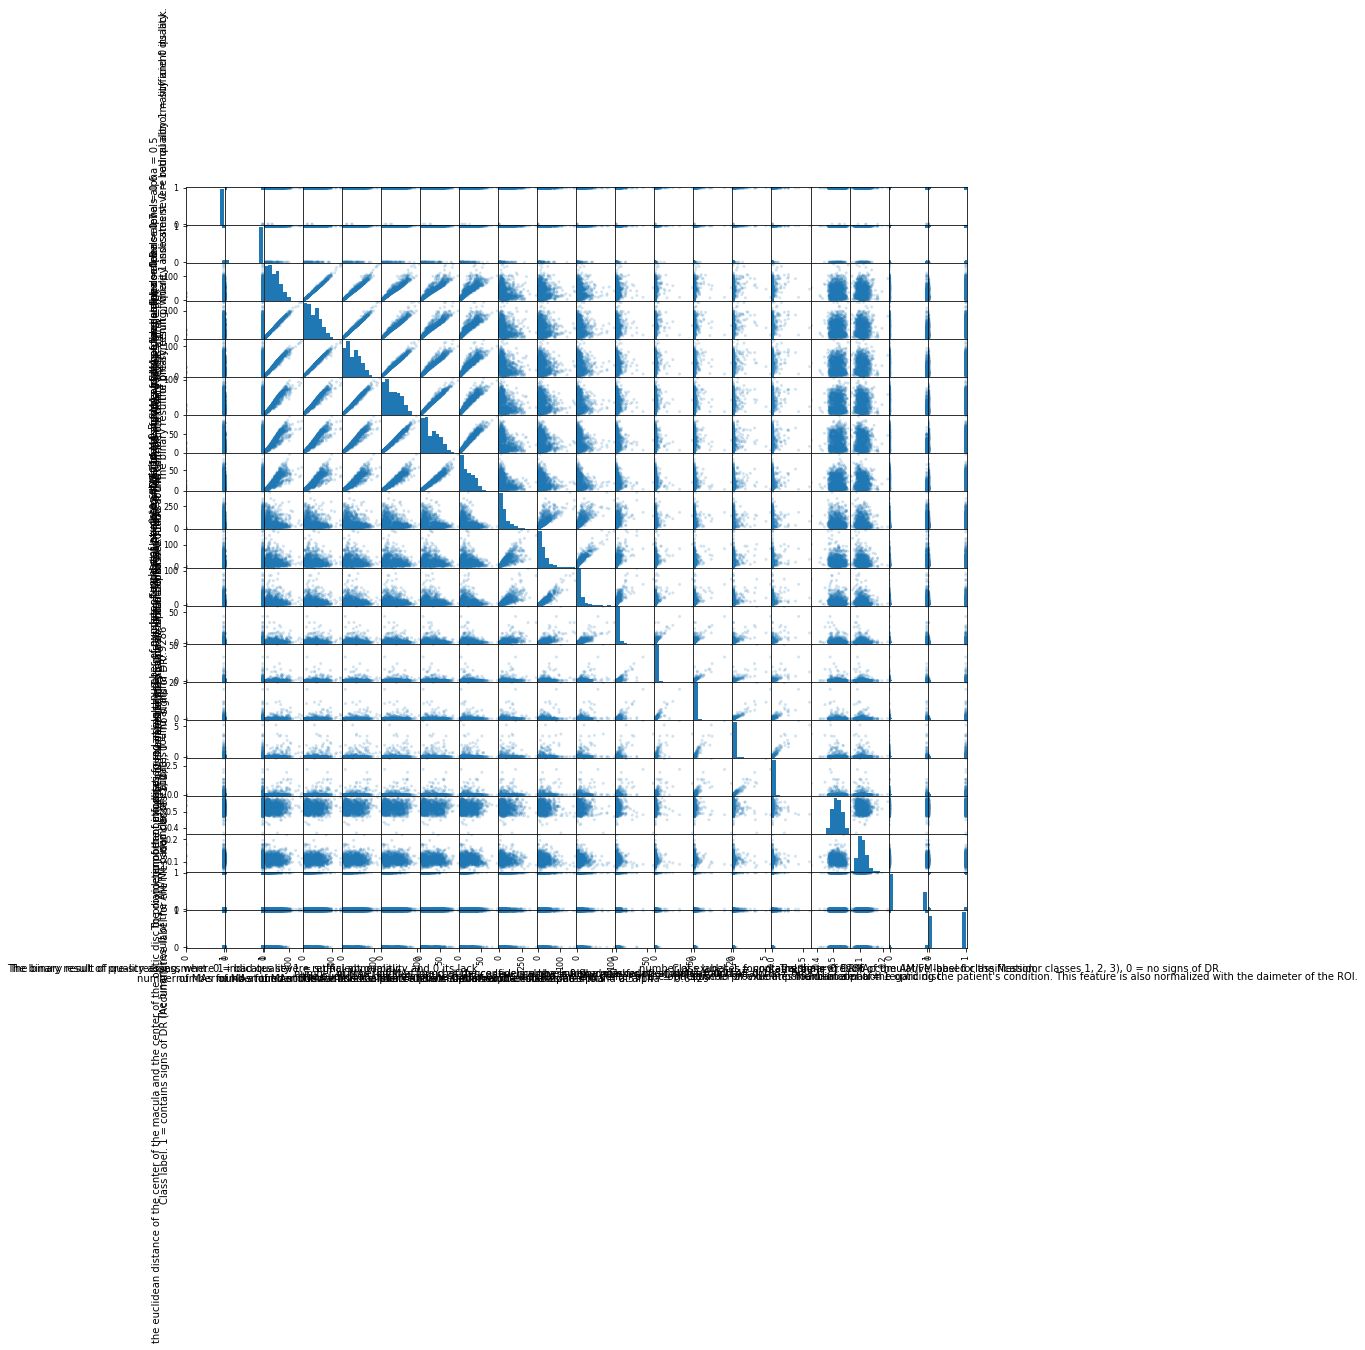

In [0]:
pd.plotting.scatter_matrix(dataset,alpha=.2,figsize=(14,14));

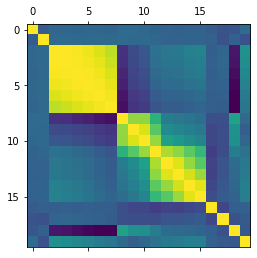

In [0]:
import matplotlib.pyplot as plt
plt.matshow(dataset.corr());
plt.show();

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Trained! Let's test it. 

predictions=regressor.predict(x_test)
predictions


array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1])

In [0]:
df = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
df.tail()

,Actual,Predicted
866,0,1
481,0,0
742,1,0
644,0,1
122,1,1


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[80 21]
 [43 87]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       101
           1       0.81      0.67      0.73       130

    accuracy                           0.72       231
   macro avg       0.73      0.73      0.72       231
weighted avg       0.74      0.72      0.72       231



only gets diagnosis right 72% of the time!

I would like to increase the accuracy of the ML algorithm. So, I tried to remove the variables that are highly correlated with one another. 

In [0]:
X2 = dataset[['The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.','The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.','number of MAs found at the confidence levels alpha = 1','number of exudates found at alpha = 1',"the euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the daimeter of the ROI.",'The diameter of the optic disc.','The binary result of the AM/FM-based classification.']]

In [0]:
X2.head()

,The binary result of quality assessment. 0 = bad quality 1 = sufficient quality.,"The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its lack.",number of MAs found at the confidence levels alpha = 1,number of exudates found at alpha = 1,the euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the daimeter of the ROI.,The diameter of the optic disc.,The binary result of the AM/FM-based classification.
0,1,1,14,0.003923,0.486903,0.100025,1
1,1,1,13,0.003903,0.520908,0.144414,0
2,1,1,33,0.007744,0.530904,0.128548,0
3,1,1,31,0.001531,0.483284,0.114790,0
4,1,1,27,0.000000,0.475935,0.123572,0


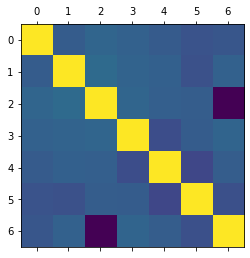

In [0]:
plt.matshow(X2.corr());
plt.show();

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X2,y,test_size=.2,random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Trained! Let's test it. 

predictions=regressor.predict(x_test)
predictions

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [0]:
df = pd.DataFrame({'Actual':y_test,'Predicted':predictions})
df.tail()

,Actual,Predicted
866,0,0
481,0,0
742,1,0
644,0,1
122,1,1


In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.60      0.56       101
           1       0.66      0.58      0.62       130

    accuracy                           0.59       231
   macro avg       0.59      0.59      0.59       231
weighted avg       0.60      0.59      0.59       231

